In [28]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [29]:
def display(raw_data_x, raw_data_y, idx):
    label = raw_data_y[idx]  # like '5'
    print("digit = ", str(label), "\n")
    pixels = np.array(raw_data_x[idx])  # target row of pixels
    pixels = pixels.reshape((28, 28))
    plt.rcParams['toolbar'] = 'None'
    plt.imshow(pixels, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [30]:
data_file = "./mnist_keras_1000.txt"
data_x = np.loadtxt(data_file, delimiter=" ",
                usecols=range(2, 786), dtype=np.float32)
labels = np.loadtxt(data_file, delimiter=" ",
                usecols=[0], dtype=np.float32)
norm_x = data_x / 255
print(f'\nLoaded {len(norm_x)} images!\n')


Loaded 1000 images!



In [31]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(50, 100),
            nn.Tanh(),
            nn.Linear(100, 784),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [32]:
autoenc = Autoencoder()
simple_adam = optim.Adam(autoenc.parameters(), lr=0.01)

loss_function = nn.MSELoss()

norm_x = torch.tensor(norm_x)

In [33]:
max_epochs = 500
for epoch in range(max_epochs):
    # Forward pass
    output = autoenc(norm_x)
    loss = loss_function(output, norm_x)

    simple_adam.zero_grad()
    loss.backward()
    simple_adam.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss.item()}")

print("Training complete")

Epoch 100/500, Loss: 0.02444225735962391
Epoch 200/500, Loss: 0.01811107061803341
Epoch 300/500, Loss: 0.015681732445955276
Epoch 400/500, Loss: 0.014132259413599968
Epoch 500/500, Loss: 0.013870881870388985
Training complete


In [34]:
norm_x = torch.tensor(norm_x)

predicteds = autoenc(norm_x).detach().numpy()

N = len(norm_x)
max_se = 0.0
max_ix = 0
ANOMALIES = []
for i in range(N):
    diff = norm_x[i] - predicteds[i]
    curr_se = torch.sum(diff * diff).item()
    ANOMALIES.append((curr_se, i))
    if curr_se > max_se:
        max_se = curr_se
        max_ix = i

ANOMALIES.sort(reverse=True)

/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T/ipykernel_95317/3503786214.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  norm_x = torch.tensor(norm_x)



Most anomalous digit is at index  799
digit =  2.0 



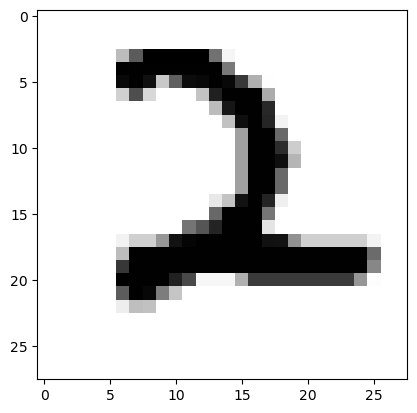

digit =  8.0 



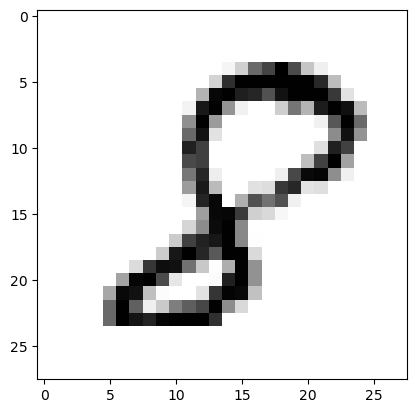

digit =  2.0 



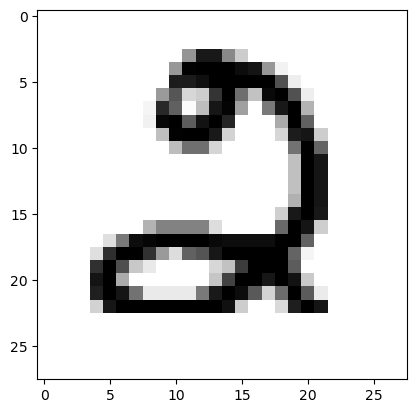

digit =  2.0 



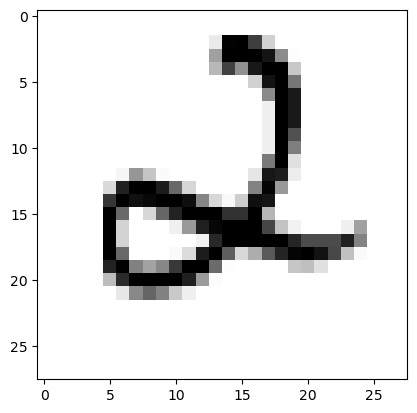

digit =  5.0 



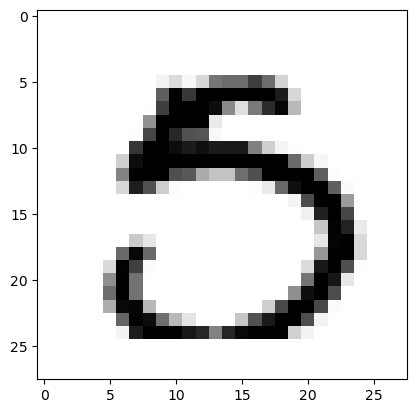

digit =  9.0 



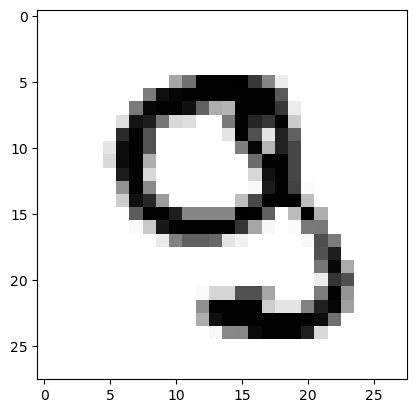

digit =  4.0 



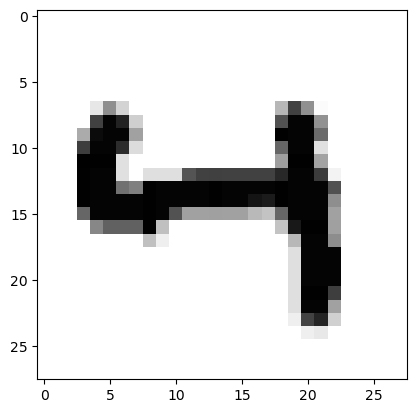

digit =  4.0 



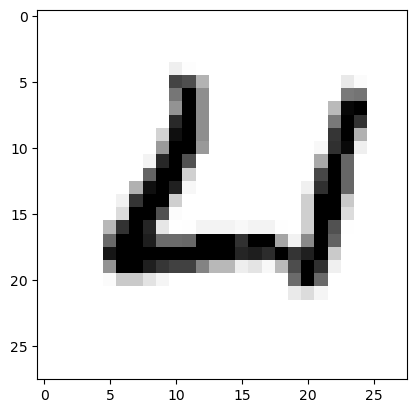

digit =  0.0 



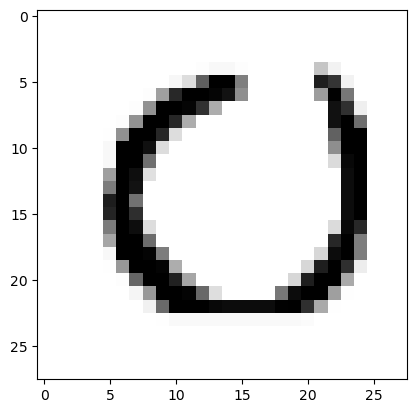

digit =  8.0 



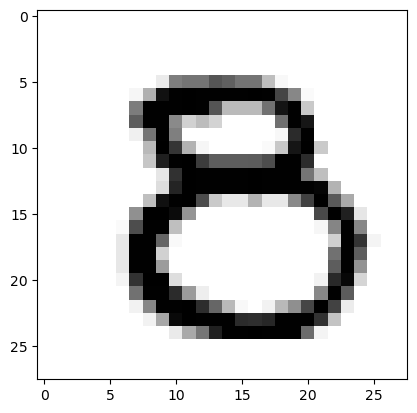

In [35]:
raw_data_x = data_x
raw_data_y = labels

print("\nMost anomalous digit is at index ", max_ix)
display(raw_data_x, raw_data_y, max_ix)

for a in ANOMALIES[1:10]:
    display(raw_data_x, raw_data_y, a[1])